In [2]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [6]:
def load_dataset(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"D:\Datasets\housing.csv")
    return pd.read_csv(csv_path)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dell 5570\AppData\Local\Temp\ipykernel_10152\3220746523.py:2: SyntaxWarning: invalid escape sequence '\D'
  csv_path=os.path.join(housing_path,"D:\Datasets\housing.csv")


In [8]:
df=load_dataset()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
df=df.dropna()
#df["total_bedrooms"]=df["total_bedrooms"].median()

In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
X=df.drop(["ocean_proximity"],axis=1)
y=df["ocean_proximity"]

In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
encoded=le.fit_transform(df["ocean_proximity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe7f6287a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe7f628da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe7f5f9be0>,
 'medians': [<matplotlib.lines.Line2D at 0x1fe7f6293a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fe7f6296a0>,
 'means': []}

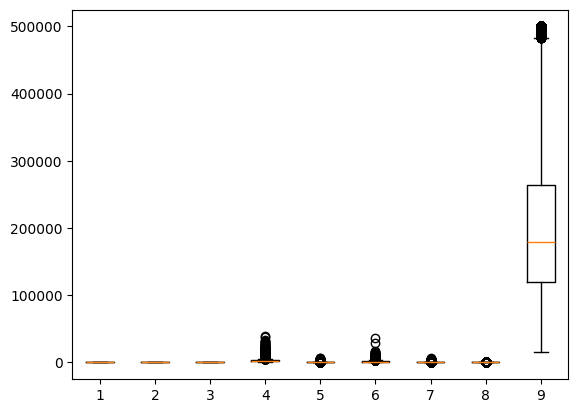

In [26]:
plt.boxplot(X,vert=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

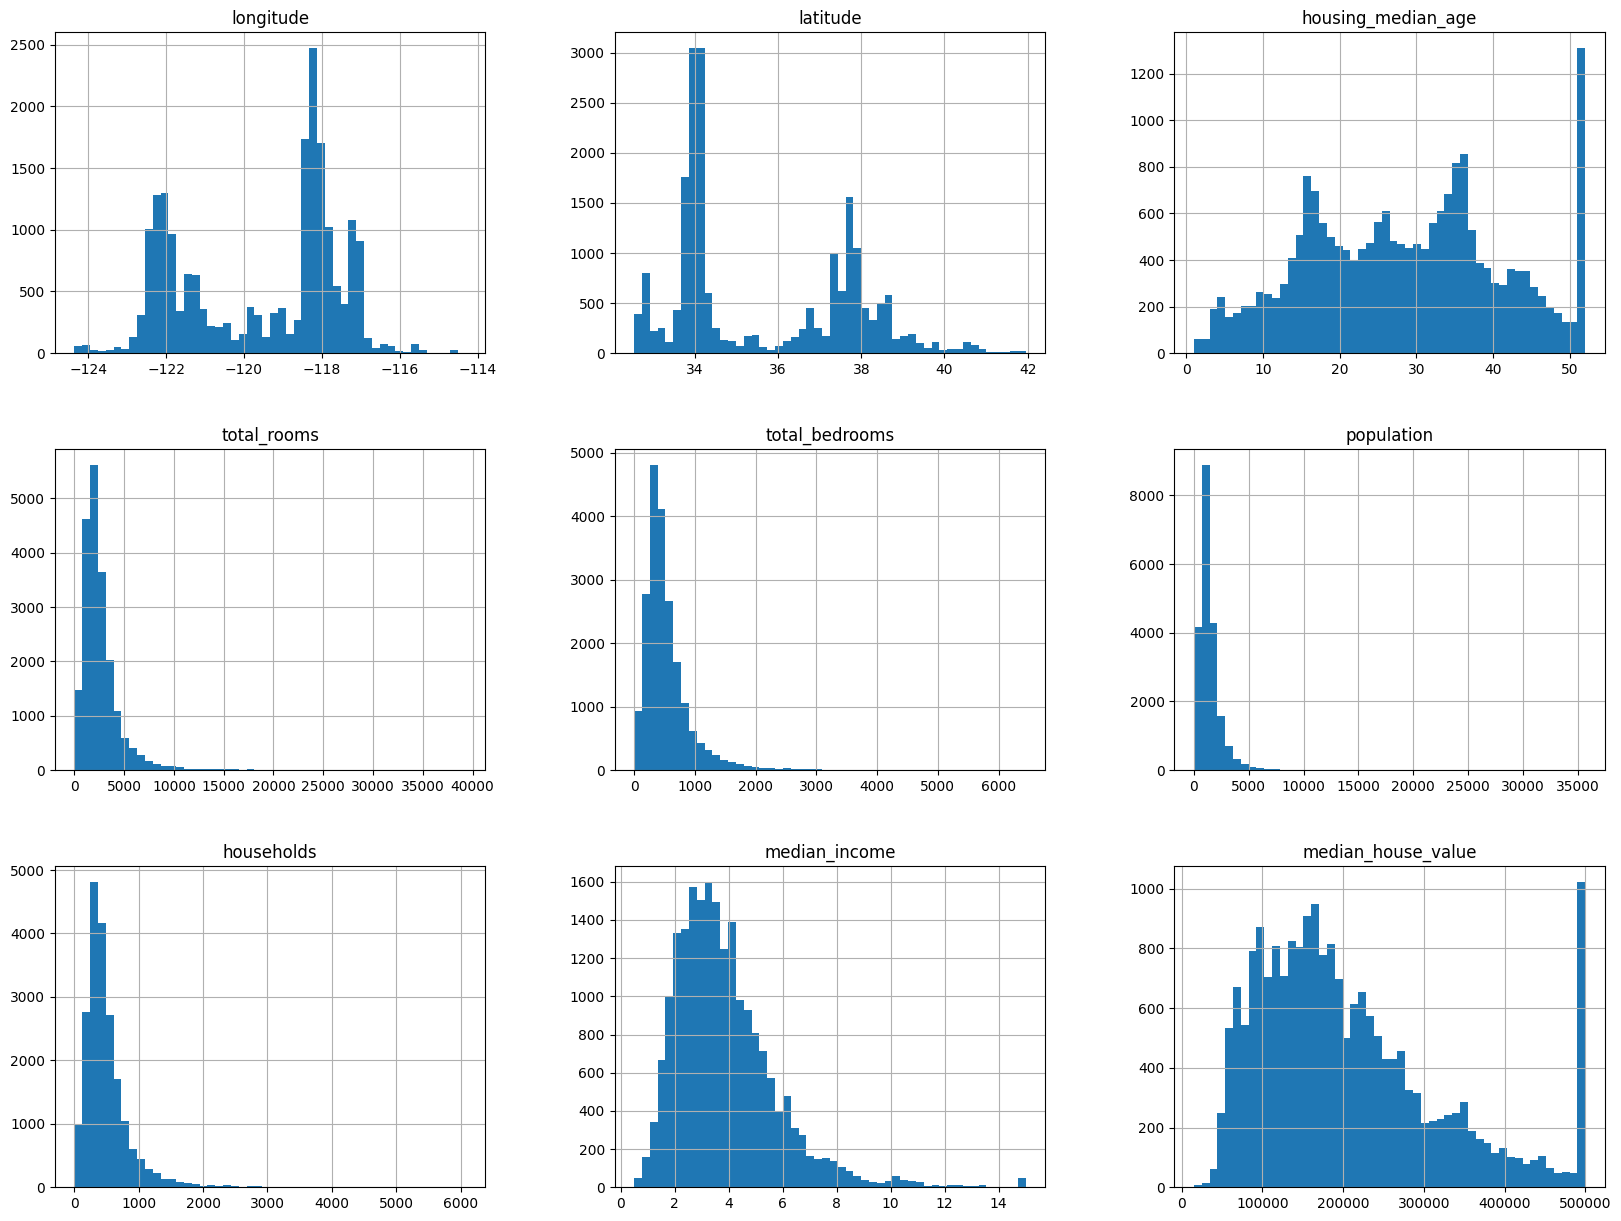

In [28]:
df.hist(bins=50,figsize=(20,15))

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [34]:
from sklearn.svm import SVC

In [36]:
clf=SVC()

In [38]:
clf.fit(x_train,y_train)

SVC()

In [40]:
y_pred=clf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,precision_score

In [44]:
accuracy=accuracy_score(y_test,y_pred)

In [46]:
accuracy

0.6143870809885001

In [48]:
print(classification_report(y_test,y_pred))

NameError: name 'classification_report' is not defined

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [55]:
rf_pred=rf.predict(x_test)

In [56]:
accuracy1=accuracy_score(y_test,rf_pred)

In [57]:
accuracy1

0.9721066797161733

In [62]:
print(classification_report(y_test, y_pred_rf))

NameError: name 'classification_report' is not defined

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt=DecisionTreeClassifier(random_state=42)

In [68]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
dt_pred=dt.predict(x_test)

In [72]:
accuracy2=accuracy_score(y_test,dt_pred)

In [74]:
accuracy2

0.973330070956692

In [76]:
from sklearn.metrics import confusion_matrix

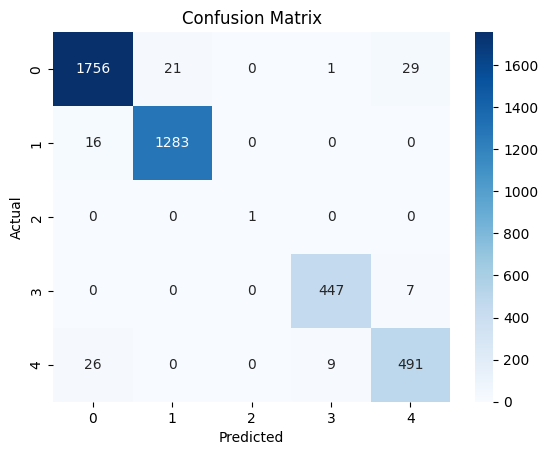

In [78]:
cm=confusion_matrix(y_test,dt_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
cm

array([[1756,   21,    0,    1,   29],
       [  16, 1283,    0,    0,    0],
       [   0,    0,    1,    0,    0],
       [   0,    0,    0,  447,    7],
       [  26,    0,    0,    9,  491]], dtype=int64)

<Axes: xlabel='longitude', ylabel='latitude'>

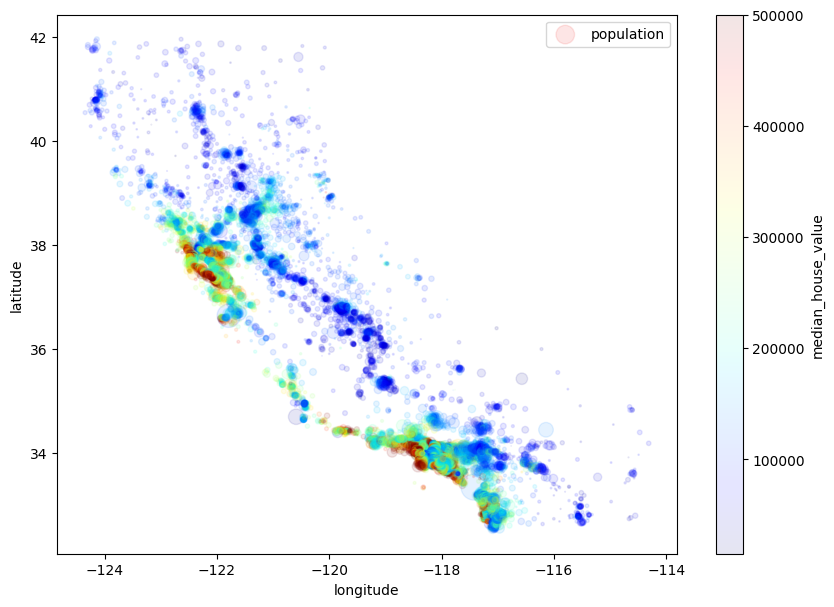

In [82]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=df["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],  # Corrected this line
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [7, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.1],
    'splitter': ['best', 'random']
}
# Set up Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

D:\JN\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
D:\JN\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4320 fits failed out of a total of 17280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "D:\JN\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\JN\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "D:\JN\Lib\site-packages\sklearn\base.py", line 436, i

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [87]:
accuracy4=accuracy_score(y_test,dt_pred)

In [88]:
accuracy4

0.973330070956692

In [89]:
from sklearn.model_selection import KFold

In [90]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)

In [91]:
accuracy5=accuracy_score(y_test,dt_pred)

In [92]:
accuracy5

0.973330070956692

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
cv_scores=cross_val_score(dt,x_train,y_train,cv=10,scoring='accuracy')

D:\JN\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [95]:
cv_scores

array([0.97553517, 0.9675841 , 0.97308869, 0.97798165, 0.97553517,
       0.9853211 , 0.96756426, 0.98164015, 0.97429621, 0.97246022])

In [96]:
print(np.mean(cv_scores))

0.9751006703872974


In [97]:
dt.fit(x_train, y_train)  # Fit on the entire training set
y_test_pred = dt.predict(x_test)  # Make predictions on test set
test_accuracy = np.mean(y_test == y_test_pred)  # Accuracy calculation
print("Test Set Accuracy: ", test_accuracy)

Test Set Accuracy:  0.973330070956692


In [113]:
import pickle

In [117]:
with open('model.pickle','wb')as file:
    pickle.dump(dt,file)